In [139]:
import tensorflow as tf
import numpy as np
import os
import PIL
from PIL import Image
import cv2
import imghdr
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from skimage import io

In [6]:
data_dir = "The IQ-OTHNCCD lung cancer dataset"

In [7]:
bengin_cases = os.listdir(os.path.join(data_dir,"Bengin cases"))
normal_cases = os.listdir(os.path.join(data_dir, "Normal cases"))
malignant_cases = os.listdir(os.path.join(data_dir, "Malignant cases"))

In [8]:
bengin_dataset = []
for i in bengin_cases:
    img = Image.open("The IQ-OTHNCCD lung cancer dataset/Bengin cases/" + i).convert(
        "L")
    arr = numpy.array(img)
    bengin_dataset.append(arr)


In [9]:
from scipy import ndimage
filtered_bengin = []
for i in bengin_dataset:
   img = ndimage.median_filter(i, size = 3)
   filtered_bengin.append(img)

In [10]:
normal_dataset = []
for i in normal_cases:
    img = Image.open("The IQ-OTHNCCD lung cancer dataset/Normal cases/" + i).convert(
        "L")
    arr = numpy.array(img)
    normal_dataset.append(arr)

In [11]:
from scipy import ndimage
filtered_normal = []
for i in normal_dataset:
   img = ndimage.median_filter(i, size = 3)
   filtered_normal.append(img)

In [12]:
malignant_dataset = []
for i in malignant_cases:
    img = Image.open("The IQ-OTHNCCD lung cancer dataset/Malignant cases/" + i).convert(
        "L")
    arr = numpy.array(img)
    malignant_dataset.append(arr)

In [13]:
from scipy import ndimage
filtered_malignant = []
for i in malignant_dataset:
   img = ndimage.median_filter(i, size = 3)
   filtered_malignant.append(img)

In [14]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-processed/Bengin cases"
while i < len(filtered_bengin):
    cv2.imwrite(os.path.join(path, "Bengin cases" + str(i) + ".jpg"), filtered_bengin[i])
    i+=1

In [15]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-processed/Normal cases"
while i < len(filtered_normal):
    cv2.imwrite(os.path.join(path, "Normal cases" + str(i) + ".jpg"), filtered_normal[i])
    i+=1

In [16]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-processed/Malignant cases"
while i < len(filtered_malignant):
    cv2.imwrite(os.path.join(path, "malignant_cases" + str(i) + ".jpg"), filtered_malignant[i])
    i+=1

In [46]:
data_dir = "The IQ-OTHNCCD lung cancer dataset-processed"

In [47]:
bengin_cases = os.listdir(os.path.join(data_dir,"Bengin cases"))
normal_cases = os.listdir(os.path.join(data_dir, "Normal cases"))
malignant_cases = os.listdir(os.path.join(data_dir, "Malignant cases"))

In [78]:
dataset = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(256,256))

Found 1097 files belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)])

In [79]:
data_iterator = dataset.as_numpy_iterator()

In [80]:
batch = data_iterator.next()

In [81]:
class_names = dataset.class_names
print(class_names)

['Bengin cases', 'Malignant cases', 'Normal cases']


In [152]:
dataset = dataset.map(lambda x, y: (x/255, y))

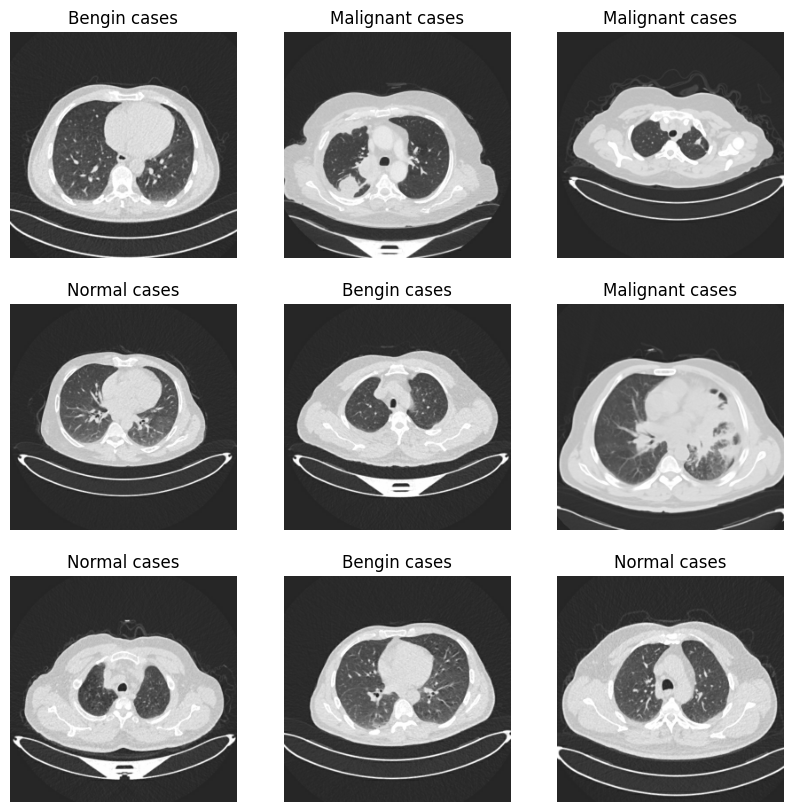

In [154]:
plt.figure(figsize=(10, 10))
for image, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy())
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [155]:
for images, labels in dataset.take(1):
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

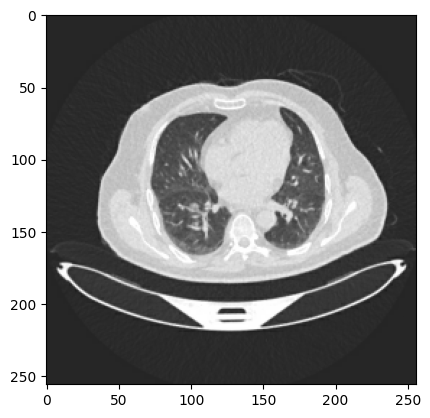

In [162]:
plt.imshow(numpy_images[0])

In [164]:
image = cv2.imread("The IQ-OTHNCCD lung cancer dataset-processed/Malignant cases/malignant_cases373.jpg")

In [165]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

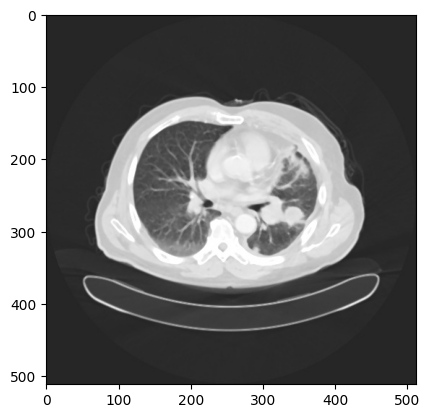

In [166]:
plt.imshow(image)

In [338]:
from PIL import Image as im
import matplotlib.image
def scale(data,name):
    scaled = []
    for i in data:
        if i == ".ipynb_checkpoints":
            continue
        image = cv2.imread("The IQ-OTHNCCD lung cancer dataset-processed/" + name + "/"+ i)
        image -= image.min() 
        image = image / image.max()
        image *= 255 # [0, 255] range
        cv2.imwrite("The IQ-OTHNCCD lung cancer dataset-scaled/" + name  +"/" + i, image)

In [339]:
scale(bengin_cases, "Bengin cases")
scale(normal_cases, "Normal cases")
scale(malignant_cases, "Malignant cases")

In [340]:
data = "The IQ-OTHNCCD lung cancer dataset-scaled"
scaled_bengin  = os.listdir(os.path.join(data,"Bengin cases"))
scaled_normal = os.listdir(os.path.join(data, "Normal cases"))
scaled_malignant = os.listdir(os.path.join(data, "Malignant cases"))

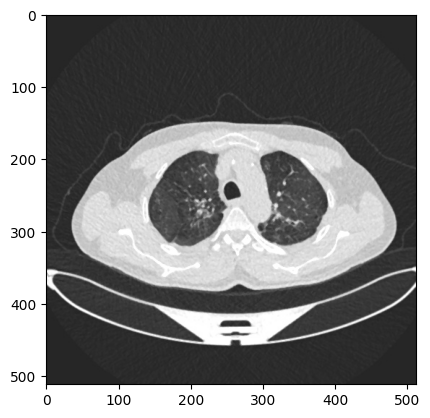

In [311]:
image = cv2.imread("The IQ-OTHNCCD lung cancer dataset-processed/Normal cases/Normal cases0.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


[[[4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  ...
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]]

 [[4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  ...
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]]

 [[4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  ...
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]]

 ...

 [[4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  ...
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]]

 [[4.61538462 4.61538462 4.61538462]
  [4.61538462 4.61538462 4.61538462]


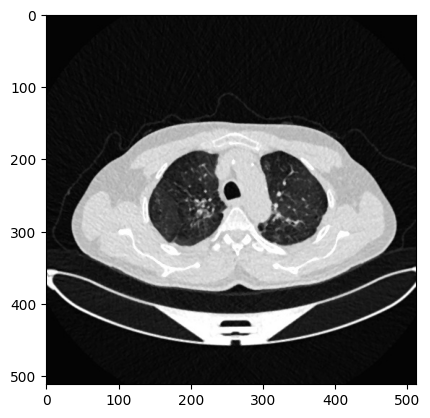

In [322]:
image -= image.min() 
image = image / image.max()
image *= 255 # [0, 255] range
print(image)
plt.imshow((image).astype(np.uint8))



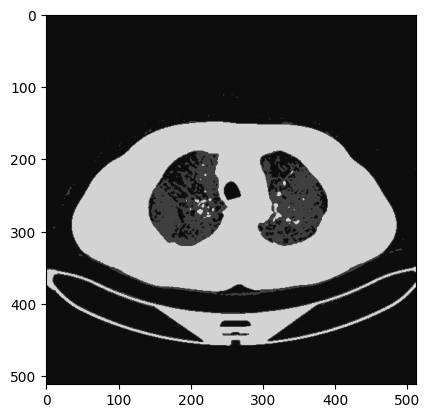

In [313]:

pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)
#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)

In [341]:
def segmentation(image, name):
    
    image = cv2.imread("The IQ-OTHNCCD lung cancer dataset-scaled/" + name + "/"+ image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixel_vals = image.reshape((-1,3))
    pixel_vals = np.float32(pixel_vals)
    #the below line of code defines the criteria for the algorithm to stop running, 
    #which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
    #becomes 85%
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
    # then perform k-means clustering with number of clusters defined as 3
    #also random centres are initially choosed for k-means clustering
    k = 3
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
 
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    return segmented_image            

In [342]:
segmented_bengin = []
for image in scaled_bengin:
    if image == ".ipynb_checkpoints":
        continue
    segmented_bengin.append(segmentation(image, "Bengin cases"))

In [343]:
segmented_normal = []
for image in scaled_normal:
    if image == ".ipynb_checkpoints":
        continue
    segmented_normal.append(segmentation(image, "Normal cases"))

In [344]:
segmented_malignant = []
for image in scaled_malignant:
    if image == ".ipynb_checkpoints":
        continue
    segmented_malignant.append(segmentation(image, "Malignant cases"))

In [345]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-segmentated/Bengin cases"
while i < len(segmented_bengin):
    cv2.imwrite(os.path.join(path, "Bengin cases" + str(i) + ".jpg"), segmented_bengin[i])
    i+=1

In [346]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-segmentated/Normal cases"
while i < len(segmented_normal):
    cv2.imwrite(os.path.join(path, "Normal cases" + str(i) + ".jpg"), segmented_normal[i])
    i+=1

In [349]:
i = 0
path = "The IQ-OTHNCCD lung cancer dataset-segmentated/Malignant cases"
while i < len(segmented_malignant):
    cv2.imwrite(os.path.join(path, "Malignant cases" + str(i) + ".jpg"), segmented_malignant[i])
    i+=1

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [63]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)

In [66]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)

In [67]:
train = dataset.take(train_size)
val = dataset.take(val_size)
test = dataset.take(test_size)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [121]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding="same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding="same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding="same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256,activation = "relu"),
    layers.Dense(1,activation = "sigmoid")])

In [98]:

model.add(Conv2D(16,(3,3),1,activation = "relu", input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation = "relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation = "relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

In [122]:
model.compile("adam", loss = tf.losses.BinaryCrossentropy(), metrics = ["accuracy"])

In [117]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [123]:
logdir = "logs"

In [124]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [127]:
hist = model.fit(train, epochs = 50, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/50
24/24 [==============================] - 6s 239ms/step - loss: -1449245802496.0000 - accuracy: 0.5091 - val_loss: -1317815451648.0000 - val_accuracy: 0.5179
Epoch 2/50
24/24 [==============================] - 6s 235ms/step - loss: -2020360585216.0000 - accuracy: 0.4948 - val_loss: -1848760205312.0000 - val_accuracy: 0.4821
Epoch 3/50
24/24 [==============================] - 6s 235ms/step - loss: -2469589680128.0000 - accuracy: 0.5117 - val_loss: -2500573003776.0000 - val_accuracy: 0.4688
Epoch 4/50
24/24 [==============================] - 6s 242ms/step - loss: -3125651701760.0000 - accuracy: 0.5091 - val_loss: -3260554936320.0000 - val_accuracy: 0.4554
Epoch 5/50
 8/24 [=========>....................] - ETA: 3s - loss: -3008432177152.0000 - accuracy: 0.4922

KeyboardInterrupt: 